# **Lab 6:Sampling Distributions and Confidence Intervals (20 points)**

#### **Dylan Watson**


---

**IMPORTANT**:
- Before starting the lab, save a copy to your google drive by navigating to `File > Save a copy in Drive` <br>
- Then rename the copied file `Lab#_LASTNAME_FIRSTNAME.ipynb` where # is the lab assignment number, LASTNAME is your last name, and FIRSTNAME is your first name.

<br>


**Instructions**: Complete the lab below.

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---




<br>




####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>  (4 points)

1. Load the COPD dataset available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv) as dataframe called `copd`

2. Remove rows where `total_lung_capacity` is equal to -1.

3. Remove rows where `emphysema` is equal to `"unknown"`

4. How many rows does the `copd` dataframe have after removing the rows from Task 1.2 and Task 1.3? <br> [Hint: should between 4300 and 4400 rows]

In [1]:
url = "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv"
copd = read.csv(url)
copd = copd[copd$total_lung_capacity != -1, ]
copd = copd[copd$emphysema != "unknown", ]
nrow(copd)

[1] 4367

There are 4367 rows in the dataframe after cleaning.

<br>

---

<br>






####<font color=red>Task 2</font>  (4 points)

`total_lung_capacity` is the number of liters of air in the lungs. <br>
`emphysema` is the emphysema diagnosis by a physician.

<br>

1. (2 points) Plot a histogram of `total_lung_capacity`. Describe what you observe in complete sentences (e.g., Range, skewness or symmetry, mean, normally distributed, etc.)

<br>

2. (2 points) Plot a boxplot of `total_lung_capacity` vs `emphysema`. What do you observe in the context of the lung capacity and emphysema?
```
boxplot(copd$total_lung_capacity~copd$emphysema)
```

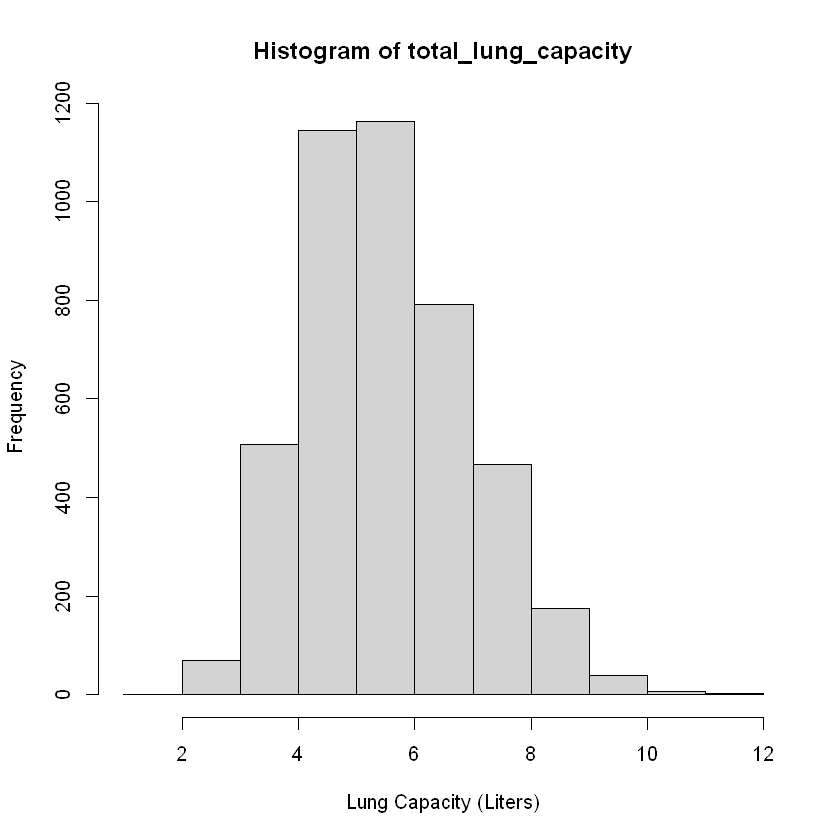

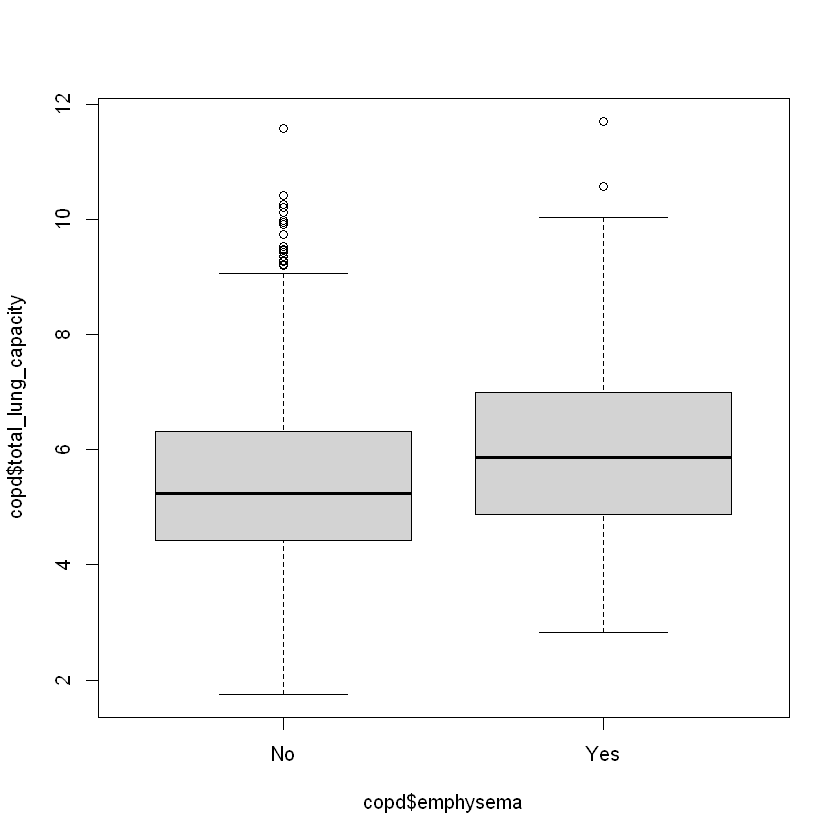

In [2]:
hist(copd$total_lung_capacity, main = "Histogram of total_lung_capacity", xlab = "Lung Capacity (Liters)", ylab = "Frequency")
boxplot(copd$total_lung_capacity~copd$emphysema)

1. The distribution of total lung capacity appears mostly normally distributed, if not possible slightly right skewed. The values range between 2 and 12 liters and have a mode around 5-6 liters.
2. Those with emphysema appear to have a greater mean total lung capacity as well as greater Q1, Q3, lower, and upper tails of capacity. However, there are more outliers in the lung capacity for those without emphysema.

<br>

---

<br>






####<font color=red>Task 3</font>  (4 points)

1. Create a 95% confidence interval `total_lung_capacity` using the following command
```
t.test(copd$total_lung_capacity)$conf.int
```
What is the meaning of this confidence interval? Explain in the context of 95% probability.

<br>

2. Is the average lung capacity of the population less than 6 liters? Use the confidence interval to answer. Explain your reasoning in complete sentences.

<br>

3. Create a 95% confidence interval to compare the average `total_lung_capacity` between patients with and without `emphysema`using the following command
```
t.test( copd$total_lung_capacity ~ copd$emphysema )$conf.int
```
What is the meaning of this confidence interval? Explain in the context of 95% probability.

<br>

4. Based on the 95% confidence interval from Task 3.3, is the lung capacity for patients with emphysema significantly less than or greater than the lung capacity for patients without emphysema? Or are they not significantly different? <br> Explain how you came to your conclusion in complete sentences.

In [3]:
t.test(copd$total_lung_capacity)$conf.int
t.test(copd$total_lung_capacity ~ copd$emphysema )$conf.int

[1] 5.482309 5.565455
attr(,"conf.level")
[1] 0.95

[1] -0.6721065 -0.4612752
attr(,"conf.level")
[1] 0.95

1. We are 95% confident that the true population mean of total lung capacity lies between the values (5.48, 5.56) liters.
2. Yes based on the 95% t-test confidence interval we can claim that the average lung capacity is less than 6 liters.
3. We are 95% confident that the difference in mean total lung capacity of those with and those without emphysema is between (-0.67,-0.46) liters. Negative meaning that those without emphysema have lesser lung capacity on average than those with.
4. We can claim that the mean total lung capacity of those with emphysema is greater than those without with statistical significance. The interval does not contain zero.

<br>

---

<br>






####<font color=red>Task 4</font>  (7 points)

1. Calculate the average of `total_lung_capacity` and store as `mean_tlc`. What is the average lung capacity? Answer in a complete sentence.

<br>

2. Use the `sample()` function to randomly sample 100 values from `total_lung_capacity`. Store the sample as `tlc_sample`. Print `tlc_sample`.

<br>

3. Use `t.test()` to store the confidence interval of `tlc_sample` as the variable `tlc_ci`. Print `tlc_ci`.

<br>

4. Use the following Boolean expression to determine if the "true mean" `mean_tlc` is in the interval.
```
mean_tlc > tlc_ci[1] & mean_tlc < tlc_ci[2]
```
Store as `tlc_bool` and print.

<br>

5. (2 points) Place the lines of code for Tasks 4.1 - 4.4 inside the following loop. Run the loop and print `count`.
```
# task 4.1 average lung capacity
set.seed(10)
mean_tlc <- mean(copd$total_lung_capacity)
count <- 0
for (ii in 1:10000) {

  # task 4.2 sample from the "population"
  tlc_sample <-

  # task 4.3 calculate confidence interval
  tlc_ci <-

  # task 4.4 determine if "true" mean is in interval
  tlc_bool <-

  count <- count + tlc_bool
}
```
The loop above creates 10,000 confidence intervals for `total_lung_capacity` and counts (`count`) the number of times the "true" population mean is contained within this interval.

<br>

6. What percentage of the time is the "true" population mean contained with the 10,000 confidence intervals? Answer in a complete sentence.

<br>

**Another intepretation**: If we were to resample the population over and over again, approximately 95% of the 95% confidence intervals from those samples should contain the true population mean!

In [4]:
# task 4.1 average lung capacity
set.seed(10)
mean_tlc <- mean(copd$total_lung_capacity)
count <- 0
for (ii in 1:10000) {

  # task 4.2 sample from the "population"
  tlc_sample <- sample(copd$total_lung_capacity, size = 100)

  # task 4.3 calculate confidence interval
  tlc_ci <- t.test(tlc_sample)$conf.int

  # task 4.4 determine if "true" mean is in interval
  tlc_bool <- mean_tlc > tlc_ci[1] & mean_tlc < tlc_ci[2]

  count <- count + tlc_bool
}
prop_true = count / 10000
prop_true

[1] 0.9545

1. The mean total lung capacity of this dataset is 5.52 liters.
5. The 95% t-test confidence interval for the samples contained the true dataset mean total lung capacity 95.45% of the time as statistically expected.